Recap & Conclusion from Analysis

Overall Goal:

    As a Marketing Analyst, analyzing datasets to understand problem of current markeing campaign problems and propose data-driven solutions for Chief Marketing Officer.

Actionable Findings:

    1. Most successful advertising campaign was the most recent campaign (column name: Response), and was particularly successful in Mexico (more than 60% acceptance rate).
    2. Advertising Campaign Acceptance is positively correlated with Income, negatively correlated with Having Kids/Teens
    3. Most successful products are Wines and Meats (evaluated by average customer spending on items)
    4. Underperforming channels are Deals & Catalog purchases (evaluated by average customer purchases via these channels)
    5. Best perfroming channels are web & store (evaluated by average customer purchases via these channels)
    6. Customer Portraits: 50 years old with income around $52000 per year, having 1 dependent(kid/teen), having become customer since 2013, for 9 years, with an average recency of 49 days.
    7. Profits come from senior loyal customers.

Suggestions:

    1. Conduct future advertising campaigns using same model recently implemented in Mexico.
    2. Create two streams of targeted advertising campaigns, one aimed at high-income individuals without kids/teens and another aimed at lower-income individuals with kids/teens.
    3. Focus advertising campaigns on boosting sales of less popular items.
    4. Focus advertising campaigns on more successful channels, increase customer acquisition.


In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [23]:
data = pd.read_csv('marketing_data.csv')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


Exploratory Data Analysis

In [24]:
data.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
data.shape

(2240, 28)

In [26]:
# view null values
for i in data.columns:
    null_rate = round(data[i].isnull().sum()/len(data)*100,2)
    if null_rate > 0:
        print(f" {i}'s null rate: {null_rate}%")

  Income 's null rate: 1.07%


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [28]:
#cleaning income column: drop $/, and change to float
data.columns = data.columns.str.replace(' ','')
data['Income'] = data['Income'].str.replace('$','')
data['Income'] = data['Income'].str.replace(',', '').astype('float')


In [30]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

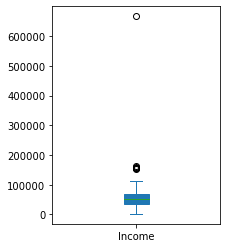

In [36]:
data['Income'].plot(kind='box',figsize = (3,4),patch_artist=True)

In [34]:
data['Income'].median()

51381.5

In [41]:
# use median value to instead null value, avoiding skewing
data['Income'] = data['Income'].fillna(data['Income'].median())

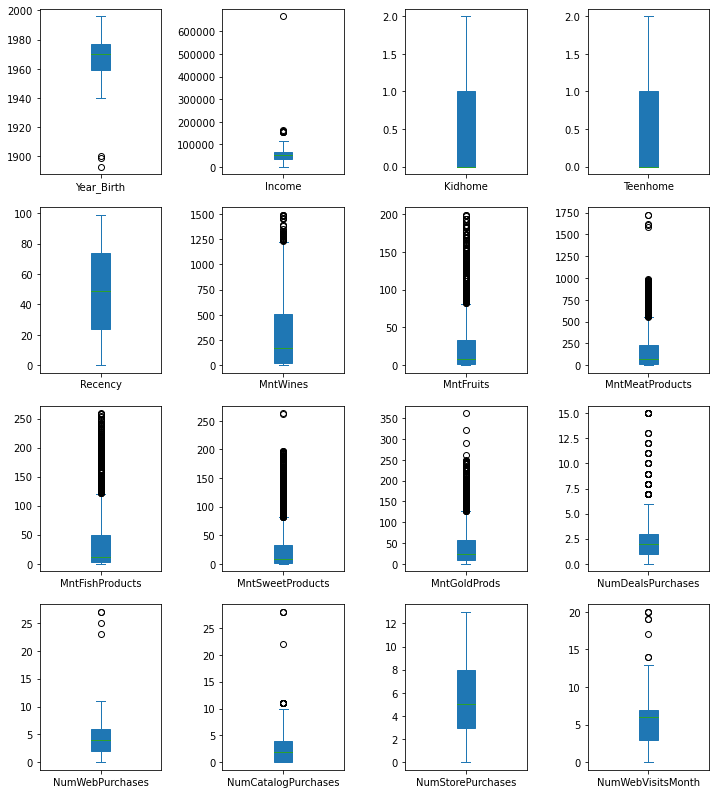

In [42]:
# finding outliers (box plot)
data_to_plot = data.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(include=np.number)
data_to_plot.plot(subplots = True, layout=(4,4),kind='box',figsize=(12,14),patch_artist=True)
plt.subplots_adjust(wspace=0.5)


Most attributes have outliers, but only 'Year_Birth' has entry error: Year_Birth < 1900.
Drop rows where Year_Birth < 1900

<AxesSubplot:>

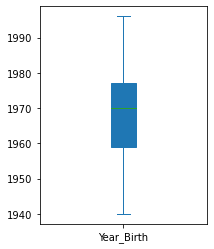

In [43]:
data = data[data['Year_Birth'] > 1900].reset_index(drop=True)
plt.figure(figsize=(3,4))
data['Year_Birth'].plot(kind='box',patch_artist=True)

change Dt_Customer to datetime

In [44]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

In [45]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [46]:
data['Dependents'] = data['Kidhome']+data['Teenhome']
# total of dependents can be engineered from sum of kidhome and teenhome

In [47]:
data['Year_Customer'] = pd.DatetimeIndex(data['Dt_Customer']).year
# year of being a customer can be engineered from dt_customer

In [49]:
mnt_cols = [col for col in data.columns if 'Mnt' in col]
data['TotalMnt'] = data[mnt_cols].sum(axis=1)
# total amount spent can be engineered from coloums containing mnt

In [50]:
purchase_cols = [col for col in data.columns if 'Purchases' in col]
data['TotalPurchases'] = data[purchase_cols].sum(axis=1)
# total amount purchased can be engineered from coloums containing mnt

In [51]:
campaigns_cols = [col for col in data.columns if 'Cmp' in col] + ['Response']
data['TotalCampaignAcc'] = data[campaigns_cols].sum(axis=1)
# total campaigns accepted

In [55]:
engineered_cols = ['ID','Dependents','Year_Customer','TotalMnt','TotalPurchases','TotalCampaignAcc']
data[engineered_cols].head()

,ID,Dependents,Year_Customer,TotalMnt,TotalPurchases,TotalCampaignAcc
0,1826,0,2014,1190,15,1
1,1,0,2014,577,18,2
2,10476,1,2014,251,11,0
3,1386,2,2014,11,4,0
4,5371,1,2014,91,8,2


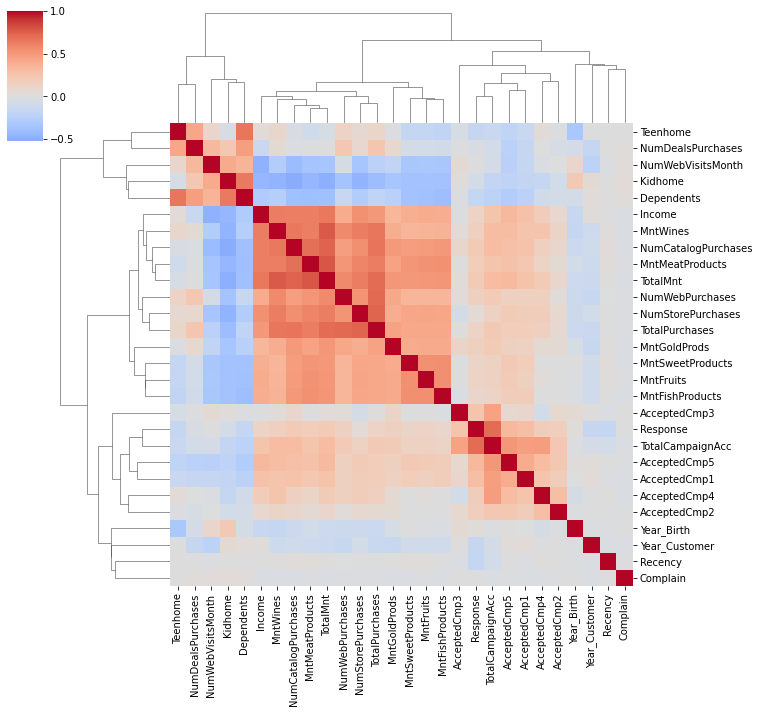

In [56]:
# feature correlations
corrs = data.drop(columns='ID').select_dtypes(include=np.number).corr(method='kendall')
sns.clustermap(corrs, cbar_pos=(-0.05,0.8,0.05,0.18),cmap='coolwarm',center = 0)


Patterns:
1. High Income Cluster:
   Amount Spent & Number of Purchase positively related to Income.
   Purchase through Web/Store/Catalog positively related to Income.
2. Have Kids&Teens Cluster:
   Amount Spent & Number of Purchase negatively related to Dependents.
   Purchasing Deals positively related to Dependents, negatively related to Income
3. Advertising Campaign Cluster:
   Acceptance of advertising campaigns is strongly related to each other.
   Acceptance of advertising campaigns is weakly positively related to Income, weakly negatively related to Have Kids.
Anomalies:
1. Number of website visits last month does not relate with an increasing number  of web purchases. 
2. Instead, Number of website visits last month positively related to number of deals purchased, meaning that deals are an effective way of stimulating purchases on website.

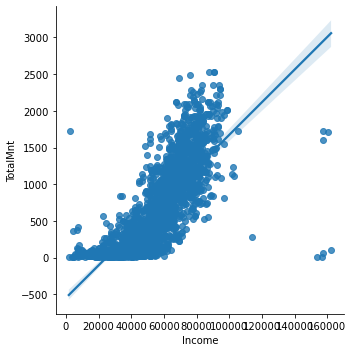

In [57]:
# Plot positive effect of high income on spending, keep income < 200000 to remove ourlier
sns.lmplot(x='Income',y='TotalMnt',data=data[data['Income']<200000])

<AxesSubplot:xlabel='Dependents', ylabel='TotalMnt'>

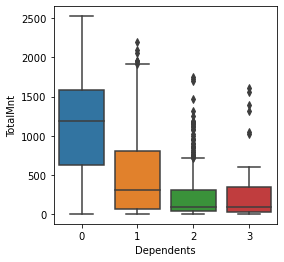

In [59]:
# plot negative effect of having kids on spending
plt.figure(figsize=(4,4))
sns.boxplot(x='Dependents',y='TotalMnt',data=data)

<AxesSubplot:xlabel='Dependents', ylabel='NumDealsPurchases'>

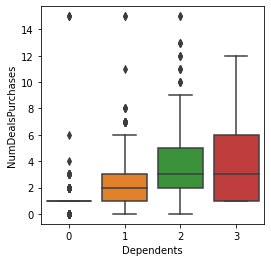

In [60]:
# plot positive effect of having kids on number of deals purchased
plt.figure(figsize=(4,4))
sns.boxplot(x='Dependents',y='NumDealsPurchases',data=data)

<AxesSubplot:xlabel='TotalCampaignAcc', ylabel='Income'>

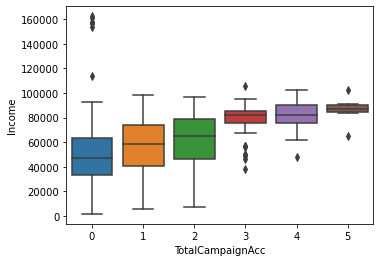

In [62]:
# plot positive effect of income, negative effect of having kids on advertising campaign acceptance
plt.figure(figsize=(5.5,4))
sns.boxplot(x='TotalCampaignAcc',y='Income',data = data[data['Income']<200000])

<AxesSubplot:xlabel='TotalCampaignAcc', ylabel='Dependents'>

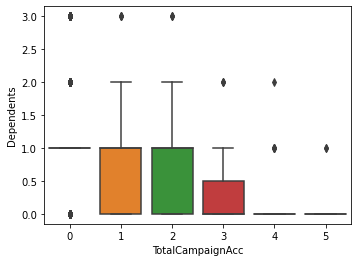

In [63]:
plt.figure(figsize=(5.5,4))
sns.boxplot(x='TotalCampaignAcc',y='Dependents',data = data)

Investigate anomaly:
1. Number of website visits last month is not positively related to number of purchases through web.
2. Instead, it's positively related to number of deals purchased, suggesting deals could be an effective way to stimulate purchase on website.

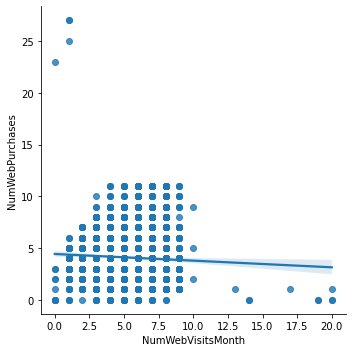

In [64]:
sns.lmplot(x='NumWebVisitsMonth',y='NumWebPurchases',data=data)

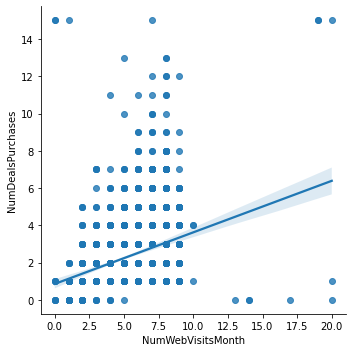

In [65]:
sns.lmplot(x='NumWebVisitsMonth',y='NumDealsPurchases',data=data)

Statistical Analysis

Run statistical tests in form of regressions to answer questions & propose data-driven action recommendations to CMO. Interpret results with non-statistical jargons so that CMO can easily understand findings.

1. Which factors are significantly related to number of store purchases?
   
   Using linear regression model with NumStorePurchases as dependent variable.
   
   Using machine learning explainability techniques to get insights about which features predict number of store purchases.

Text(0, 0.5, 'count')

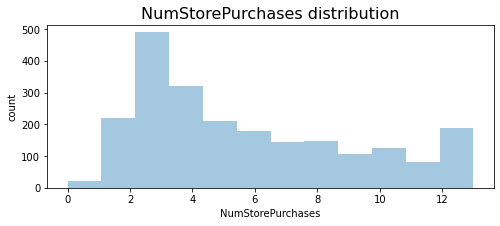

In [66]:
plt.figure(figsize=(8,3))
sns.distplot(data['NumStorePurchases'], kde=False, hist= True, bins=12)
plt.title('NumStorePurchases distribution', size = 16)
plt.ylabel('count')

In [67]:
# drop uninformative features: ID, Dt_Customer, replacing using Year_Customer
data.drop(columns=['ID','Dt_Customer'],inplace=True)

In [68]:
# one-hot encoding of categorical features
from sklearn.preprocessing import OneHotEncoder

# get categorical features and review number of unique values
cat = data.select_dtypes(exclude=np.number)
print("Number of unique values per categorical feature:\n", cat.nunique())

Number of unique values per categorical feature:
 Education         5
Marital_Status    8
Country           8
dtype: int64


In [69]:
# use one hot encoder
enc = OneHotEncoder(sparse=False).fit(cat)
cat_encoded = pd.DataFrame(enc.transform(cat))
cat_encoded.columns = enc.get_feature_names(cat.columns)

In [73]:
# merge with numeric data
num = data.drop(columns=cat.columns)
data_2 = pd.concat([cat_encoded, num], axis= 1)
data_2.head()

,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Dependents,Year_Customer,TotalMnt,TotalPurchases,TotalCampaignAcc
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,1,0,0,2014,1190,15,1
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,1,1,0,0,2014,577,18,2
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,1,2014,251,11,0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,2,2014,11,4,0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,1,0,1,2014,91,8,2


1. Fit linear regression model to training data (70%).
2. Evaluate predictions on test data(30%) using RMSE:

   Findings: RMSE is exceedingly small compared to median value of dependent variable, indicating good model predictions.

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# isolate X and Y, perform train-test split
X = data_2.drop(columns='NumStorePurchases')
y = data_2['NumStorePurchases']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

# linear regression model
model = LinearRegression()
model.fit(X_train,y_train)

# predictions
preds = model.predict(X_test)

# evaluate model using RMSE
print("Linear regression model RMSE: ", np.sqrt(mean_squared_error(y_test,preds)))
print("Median value of dependent variable: ", y.median)

Linear regression model RMSE:  4.617436576207744e-13
Median value of dependent variable:  <bound method NDFrame._add_numeric_operations.<locals>.median of 0        6
1        7
2        5
3        2
4        2
        ..
2232    11
2233     3
2234     5
2235    10
2236     4
Name: NumStorePurchases, Length: 2237, dtype: int64>


Identify features significantly affect number of store purchases, using permutation importance.

Significant features:

TotalPurchases, NumCatalogPurchases, NumWebPurchases, NumDealPurchases

Others are not significant

In [76]:
%pip install eli5

     |████████████████████████████████| 216 kB 3.7 MB/s eta 0:00:01
     |████████████████████████████████| 133 kB 22.6 MB/s eta 0:00:01
     |████████████████████████████████| 47 kB 17.7 MB/s eta 0:00:01
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=1430ae49ef5821d3d269875d595d4ebb4355dcdc40c29f5637ba75f1d1d90820
  Stored in directory: /Users/lesleyzhang/Library/Caches/pip/wheels/7b/26/a5/8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built eli5
  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 1.1.1
    Uninstalling MarkupSafe-1.1.1:
      Successfully uninstalled MarkupSafe-1.1.1
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conf

In [77]:
import eli5
from eli5.sklearn import PermutationImportance

In [78]:
perm = PermutationImportance(model, random_state= 1).fit(X_test,y_test)
eli5.show_weights(perm, feature_names= X_test.columns.tolist(),top=5)

Explore directionality of these effects, using SHAP values:

Findings:

    1. Number of store purchases increases with higher number of total purchases.
    2. Number of store purchases decreases with higher number of web/catalog/deals purchases.

Interpretation:

    Customers shopping most in stores are those who shop less via catalog, web, or special deals.
    

In [82]:
%pip install shap

     |████████████████████████████████| 436 kB 3.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [83]:
import shap

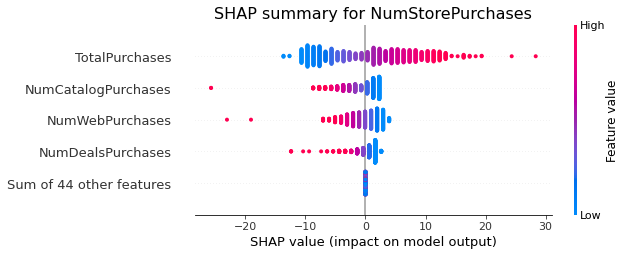

In [84]:
# calculate shap values
ex=shap.Explainer(model, X_train)
shap_values = ex(X_test)

# plot
plt.title('SHAP summary for NumStorePurchases', size = 16)
shap.plots.beeswarm(shap_values,max_display=5)

Does US fare significantly better than the Rest of World in terms of total purchases?

Plot total purchases by country:

    Findings:

        1. SP(Spain) has the highest purchases
        2.US is the last second, therefore, US doesn't fare better than the rest of the world in terms of purchases.

Text(0, 0.5, 'Number of Purchases')

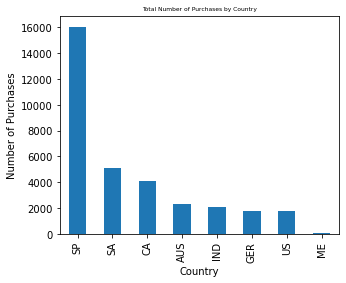

In [85]:
plt.figure(figsize=(5,4))
data.groupby('Country')['TotalPurchases'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Number of Purchases by Country', size = 6)
plt.ylabel('Number of Purchases')

Plot total amount spent by country:

    Findings:
    
        1.SP(Spain) spent the most amount.
        2.US is the last second, so US doesn't fare better than rest of the world in terms of total amount spent on purchases.

Text(0, 0.5, 'Amount Spent')

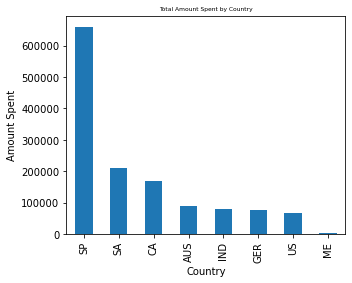

In [86]:
plt.figure(figsize=(5,4))
data.groupby('Country')['TotalMnt'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Amount Spent by Country',size = 6)
plt.ylabel('Amount Spent')

Verify are people who buy gold more conservative?

Find whether people who spent an above average amount on gold in the last 2 years would have more in store purchases or not.

    Findings:
        There is a positive relationship, but is it statistically significant?

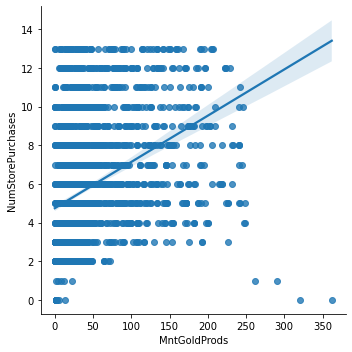

In [87]:
sns.lmplot(x='MntGoldProds', y='NumStorePurchases', data=data)

Perform kendall correlation analysis(non-parametric test since MntGoldProducts is not normally distributed and contains outliers)
    
    Findings:
        Significant positive correlation

In [88]:
from scipy.stats import kendalltau

kendall_corr = kendalltau(x=data['MntGoldProds'], y = data['NumStorePurchases'])

print('Kendall correlation(tau): ', kendall_corr.correlation)
print('Kendall p-value: ', kendall_corr.pvalue)

Kendall correlation(tau):  0.3927160395725131
Kendall p-value:  3.55881817905435e-152


Fish has Omega 3 fatty acids, good for brain. Accordingly, do "Married PhD candidates" have significant relation with amount spent on fish?

    Compare 'MntFishProducts' between 'Married PhD Candidates' and all other customers:

        Findings:

            Married PhD candidates has less significant correlation with amount spent on fish.

<AxesSubplot:xlabel='Married_PhD', ylabel='MntFishProducts'>

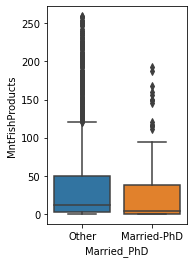

In [91]:
# sum marital status and phd dummy variables
data_2['Married_PhD'] = data_2['Marital_Status_Married']+data_2['Education_PhD']
data_2['Married_PhD'] = data_2['Married_PhD'].replace({2:'Married-PhD', 1:'Other',0:'Other'})

# plot MntFishProducts between Married-PhD and others
plt.figure(figsize=(2.5,4))
sns.boxplot(x='Married_PhD', y='MntFishProducts',data=data_2)


In [98]:
# independent t-test and p-value
from scipy.stats import ttest_ind
pval = ttest_ind(data_2[data_2['Married_PhD']=='Married-PhD']['MntFishProducts'], data_2[data_2['Married_PhD']=='Other']['MntFishProducts']).pvalue
print("t-test p-value: ", round(pval,3))

t-test p-value:  0.005


In [105]:
data_2.drop(columns='Married_PhD',inplace=True)

What other factors could be significantly related to amount spent on fish?

    Linear regression model

Text(0, 0.5, 'count')

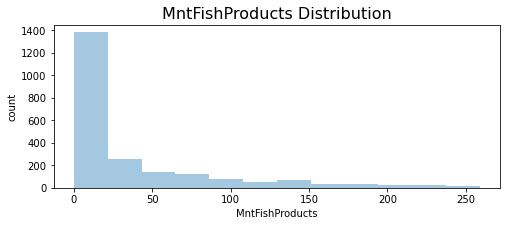

In [102]:
plt.figure(figsize=(8,3))
sns.distplot(data['MntFishProducts'], kde= False, hist = True, bins = 12)
plt.title('MntFishProducts Distribution', size = 16)
plt.ylabel('count')

Fit linear regression model with 70% training data

Evaluate predictions with 30% test data using RMSE:
    
    Findings:

        RMSE is exceedingly small compared to median of dependent variable, indicating good model predictions.

In [106]:
# isolate X and y variables, perform train-test split
X = data_2.drop(columns='MntFishProducts')
y = data_2['MntFishProducts']

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3, random_state= 1)

# linear regression model
model = LinearRegression()
model.fit(X_train,y_train)

# predictions
preds = model.predict(X_test)

# evaluate using RMSE
print("Linear Regression model RMSE: ", np.sqrt(mean_squared_error(y_test,preds)))
print("Median value of target variable: ", y.median())

Linear Regression model RMSE:  8.484441090768658e-13
Median value of target variable:  12.0


Identify features that significantly affect amount spent on fish, using permutation importance:

    Significant features:

        TotalMnt, MntWines, MntMeatProducts, MntGoldProds, MntSweetProducts, MntFurits are significant featuers.

        All others are not significant.

In [107]:
perm = PermutationImportance(model, random_state= 1).fit(X_test,y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist(),top=7)


Explore directions of these features, using SHAP

    Findings:

        1. Amount spent on fish increases with higher total amount spent
        2. Amount spent on fish decreases with higher amount spent on wine, meat, gold, fruit, sweet products.
    
    Interpretation:

        Customers who spend most on fish are those who spend less on other products.

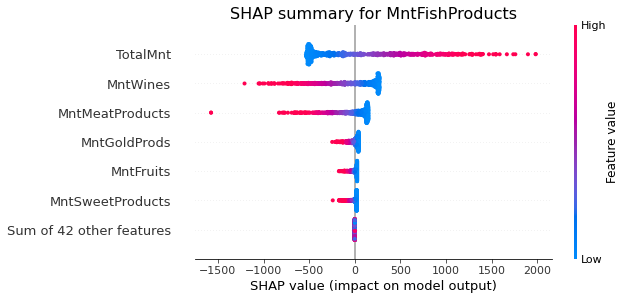

In [108]:
# calculate shap values
ex = shap.Explainer(model, X_train)
shap_values = ex(X_test)

# plot
plt.title("SHAP summary for MntFishProducts", size = 16)
shap.plots.beeswarm(shap_values, max_display=7)

Is there significant relationship between geographical regional and success of ad campaign?

Plot success of campaign by region.

    Findings:

        1. Campaign acceptance rates are low overall.
        2. Campaign with highest overall acceptance rate is the most recent campaign.
        3. Country with highest acceptance rate in any campaign is Mexico
    
    Is the effect of region on campaign success statistically significant?

In [118]:
# convert country codes to correct nomenclature for choropleth plot
data['Country_code'] = data['Country'].replace({'SP': 'ESP', 'CA': 'CAN', 'US': 'USA', 'SA': 'ZAF', 'ME': 'MEX'})

# success of campaigns by country code
data_cmp = data[['Country_code','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].melt(id_vars='Country_code', var_name='Campaign',value_name='Accepted(%)')
data_cmp = pd.DataFrame(data_cmp.groupby(['Country_code','Campaign'])['Accepted(%)'].mean()*100).reset_index(drop=False)

# rename campaign variables for easier interpreting
data_cmp['Campaign']=data_cmp['Campaign'].replace({'AcceptedCmp1': '1',
                                                'AcceptedCmp2': '2',
                                                'AcceptedCmp3': '3',
                                                'AcceptedCmp4': '4',
                                                'AcceptedCmp5': '5',
                                                 'Response': 'Most recent'
                                                })


In [114]:
%pip install plotly

     |████████████████████████████████| 15.3 MB 10.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [115]:
# choropleth plot
import plotly.express as px


In [117]:
fig = px.choropleth(data_cmp, locationmode='ISO-3', color='Accepted(%)', facet_col='Campaign',facet_col_wrap=2,facet_row_spacing=0.05, facet_col_spacing=0.01, width=700,locations='Country_code',projection='natural earth', title='Advertising Campaign Success Rate by Country')
fig.show()

To see is regional effect statistically significant on campaign success, using Logistic Regression, reporting Chisq p-value for overall model.

Findings:

    Regional differences in advertising campaign success are statistically significant.

In [120]:
# calculate logistic regression p-values for campaign acceptance ~ country using generalized linear model
import statsmodels.formula.api as smf
import statsmodels as sm
from scipy import stats

# get data of interest for glm
data_cmp_wide = data[['Country','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']]

# store statistics results
stat_results = []

# perform glm
for col in data_cmp_wide.drop(columns='Country').columns:
    this_data = data_cmp_wide[['Country', col]]
    
    # define formula
    formula = col+'~Country'
    
    # logistic regression (family=binomial)
    model = smf.glm(formula=formula, data= this_data, family = sm.genmod.families.Binomial())
    result = model.fit()
    
    # get chisquare value for overall model (CampaignAccepted ~ Country) and calculate p-value
    chisq = result.pearson_chi2
    pval = stats.distributions.chi2.sf(chisq,7)
    
    # append to stat_results
    stat_results.append(pval)
    
    # print stat summary for entire model
    print(result.summary())

# check results
print("\nChisq p-values: ", stat_results)



                 Generalized Linear Model Regression Results                  
Dep. Variable:           AcceptedCmp1   No. Observations:                 2237
Model:                            GLM   Df Residuals:                     2229
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -532.52
Date:                Wed, 14 Dec 2022   Deviance:                       1065.0
Time:                        18:21:41   Pearson chi2:                 2.23e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.0845      0.387     -7.

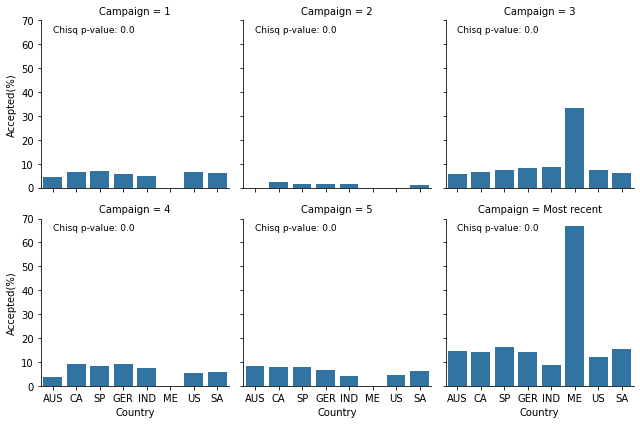

In [122]:
# plotting
# merge in the original country codes provided in dataset
countries = data[['Country','Country_code']].drop_duplicates().reset_index(drop=True)
data_cmp2 = data_cmp.merge(countries,how='left',on='Country_code')
data_cmp2.head()

# bar chart
g = sns.FacetGrid(data_cmp2,col='Campaign',col_wrap=3)
g.map(sns.barplot,'Country','Accepted(%)')
for ax, pval in zip(g.axes.flat, stat_results):
    ax.text(0,65,"Chisq p-value: "+str(pval),fontsize=9)

Data Visualization

Which marketing campaign is most successful?

    Plot marketing campaign overall acceptance rates:

        Findings: 

Text(0.5, 1.0, 'Marketing campaign success rate')

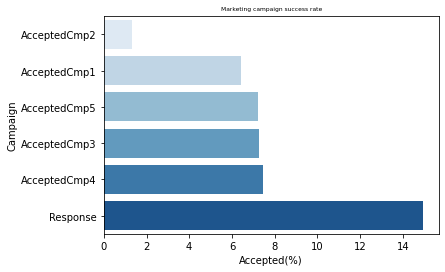

In [123]:
# calculate success rate (percent accepted)
cmp_success = pd.DataFrame(data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].mean()*100,columns=['Percent']).reset_index()

# plot
sns.barplot(x='Percent',y='index',data=cmp_success.sort_values('Percent'),palette='Blues')
plt.xlabel('Accepted(%)')
plt.ylabel('Campaign')
plt.title('Marketing campaign success rate', size = 6)


Who does the average customer look like for this company? User Portrait

    Findings: a average customer is like
    
    1. born in 1969
    2. became a customer since 2013
    3. has an income of approximately $52000 per year
    4. has 1 dependent (either kids or teens)
    5. made a purchase from company in last 49 days

In [129]:
# list of cols with binary responses
binary_cols = [col for col in data.columns if 'Accepted' in col] + ['Response','Complain']
binary_cols

# list of cols for spending
mnt_cols = [col for col in data.columns if 'Mnt' in col]
mnt_cols

# list of cols for channels
channel_cols = [col for col in data.columns if 'Num' in col] +['TotalPurchases','TotalCampaignAcc']
channel_cols

['NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'TotalPurchases',
 'TotalCampaignAcc']

In [130]:
# average customer demographics
demographics = pd.DataFrame(round(data.drop(columns=binary_cols+mnt_cols+channel_cols).mean(),1),columns=['Average']).reindex(['Year_Birth', 'Year_Customer', 'Income', 'Dependents', 'Kidhome', 'Teenhome', 'Recency'])
demographics

,Average
Year_Birth,1968.9
Year_Customer,2013.0
Income,52227.4
Dependents,1.0
Kidhome,0.4
Teenhome,0.5
Recency,49.1


Which products performed best?

    Findings: 
        Average customer spent:
            1. $25-$50 on Fruits, Sweets, Fish, Gold products
            2. over $160 on Meat products
            3. over $300 on wine products
            4. over $600 total
        Products performed best:
            1. Wine
            2. Meat


In [131]:
spending = pd.DataFrame(round(data[mnt_cols].mean(),1),columns=['Average']).sort_values(by='Average').reset_index()
spending

,index,Average
0,MntFruits,26.3
1,MntSweetProducts,27.1
2,MntFishProducts,37.5
3,MntGoldProds,44.0
4,MntMeatProducts,166.9
5,MntWines,304.0
6,TotalMnt,605.7


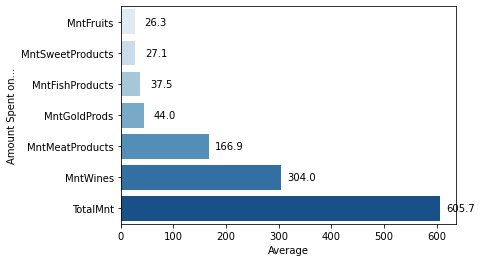

In [132]:
# plot
ax= sns.barplot(x='Average',y='index',data=spending,palette='Blues')
plt.ylabel('Amount Spent on...')

# add text labels for each bar's value
for p,q in zip(ax.patches, spending['Average']):
    ax.text(x=q+40,y=p.get_y()+0.5,s=q,ha='center')

Which channels are underperforming?

    Findings:
        Channels: average customer 
            1. accepted advertising less than 0.5
            2. made 2 deal purchases, nearly 3 catalog purchases, 4 web purchases, nearly 6 store purchases
            3. made average 14 total purchases
            4. visited web 5 times per month
        Underperforming channels:
            1. advertising campaigns
            2. followed by deals and catalog

In [133]:
channels = pd.DataFrame(round(data[channel_cols].mean(),1),columns=['Average']).sort_values(by='Average').reset_index()
channels

,index,Average
0,TotalCampaignAcc,0.4
1,NumDealsPurchases,2.3
2,NumCatalogPurchases,2.7
3,NumWebPurchases,4.1
4,NumWebVisitsMonth,5.3
5,NumStorePurchases,5.8
6,TotalPurchases,14.9


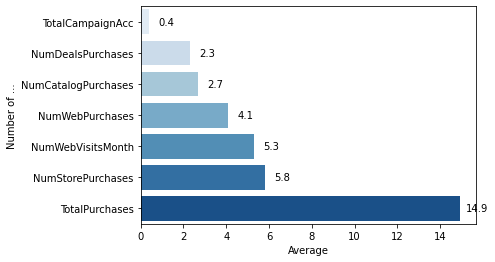

In [134]:
# plot
ax=sns.barplot(x='Average',y='index',data=channels,palette='Blues')
plt.ylabel('Number of ...')

# add text labels for each bar's value
for p,q in zip(ax.patches,channels['Average']):
    ax.text(x=q+0.8,y=p.get_y()+0.5,s=q,ha='center')